In [1]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2022)
import nltk
nltk.download('wordnet')
import pandas as pd
nltk.download('omw-1.4')
import random
import pickle
import pyLDAvis
import pyLDAvis.gensim_models
from datetime import timedelta,datetime
pyLDAvis.enable_notebook()
import matplotlib.pyplot as plt
from wordcloud import WordCloud


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nandu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\nandu\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
import json
date_list = []
tokens_list = []

cnt = 0

with open('project/dataset/sampled_covid_data.txt','r',encoding='utf-8') as fp:
    while(True):
        line = fp.readline()
        if(not line):
            break
        json_line = json.loads(line)
        tokens_list.append(json_line['keywords'])
        date_list.append(json_line['published_at'].split()[0])
        line = fp.readline()
        if(not line):
            break
        cnt+=1
        if(cnt%10000==0):
            print(cnt)

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000


In [3]:
dictionary = gensim.corpora.Dictionary(tokens_list)
dictionary.filter_extremes(no_below=2, no_above=0.90)

In [4]:

bow_corpus = [dictionary.doc2bow(doc) for doc in tokens_list]


In [5]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=9, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.026*"coronavirus" + 0.015*"virus" + 0.014*"pandemic" + 0.012*"New York" + 0.010*"Coronavirus" + 0.009*"people" + 0.009*"Trump" + 0.009*"COVID-19" + 0.008*"York" + 0.008*"Donald Trump"
Topic: 1 Word: 0.023*"coronavirus" + 0.014*"people" + 0.013*"virus" + 0.012*"pandemic" + 0.008*"Coronavirus" + 0.008*"lockdown" + 0.006*"COVID-19" + 0.006*"China" + 0.006*"social media" + 0.006*"time"
Topic: 2 Word: 0.025*"coronavirus" + 0.014*"pandemic" + 0.009*"virus" + 0.009*"Reuters" + 0.007*"President" + 0.006*"countries" + 0.006*"COVID-19" + 0.006*"country" + 0.006*"Europe" + 0.006*"people"
Topic: 3 Word: 0.022*"coronavirus" + 0.021*"lockdown" + 0.019*"India" + 0.009*"COVID-19" + 0.009*"Coronavirus" + 0.008*"people" + 0.008*"pandemic" + 0.008*"government" + 0.007*"Prime Minister" + 0.007*"Narendra Modi"
Topic: 4 Word: 0.027*"coronavirus" + 0.016*"pandemic" + 0.009*"football" + 0.009*"COVID-19" + 0.008*"season" + 0.007*"Coronavirus" + 0.007*"players" + 0.006*"League" + 0.005*"star" +

In [6]:
vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dictionary=lda_model.id2word)
vis

C:\Users\nandu\myenv\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.073061  0.066365       1        1  15.105674
0     -0.041426  0.059618       2        1  14.721478
6     -0.078768 -0.258665       3        1  13.116848
7      0.246801 -0.072558       4        1  10.503411
8     -0.044535  0.191860       5        1  10.376556
3     -0.169827  0.018705       6        1  10.166563
5     -0.076993 -0.038532       7        1   9.907037
2     -0.072585  0.006531       8        1   8.590197
4      0.164272  0.026677       9        1   7.512236, topic_info=            Term          Freq         Total Category  logprob  loglift
21      hospital  24758.000000  24758.000000  Default  30.0000  30.0000
119        India  16846.000000  16846.000000  Default  29.0000  29.0000
23      lockdown  41887.000000  41887.000000  Default  28.0000  28.0000
166     patients  10529.000000  10529.000000  Default  27.0000  27.0000
25      positive  12435.000000  12435.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
30          time   2043.566822  22696.691920   Topic9  -5.5502   0.1811
62        people   2053.321236  53353.780001   Topic9  -5.5455  -0.6688
1181      Canada   1510.044892   6037.792787   Topic9  -5.8528   1.2027
515      Twitter   1633.535680  19313.240099   Topic9  -5.7742   0.1186
269   quarantine   1557.604473  21713.263537   Topic9  -5.8218  -0.0461

[885 rows x 6 columns], token_table=       Topic      Freq                Term
term                                      
54015      8  0.991514  2020 Olympic Games
55211      1  0.998179                24th
16715      1  0.998969                25th
31083      8  0.989822              ATHENS
26364      4  0.993869                 ATP
...      ...       ...                 ...
1251       5  0.006403                year
1251       6  0.052323                year
1251       7  0.069030                year
1251       8  0.082936                year
1251       9  0.121252                year

[3830 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 7, 8, 9, 4, 6, 3, 5])

In [7]:
pyLDAvis.save_html(vis, 'covid_lda.html')

In [8]:
print('\nPerplexity: ', lda_model.log_perplexity(bow_corpus))  # a measure of how good the model is. lower the better.


Perplexity:  -9.262429872204743


In [9]:
from gensim.models import CoherenceModel

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokens_list, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4721672765759709


Topic: 0


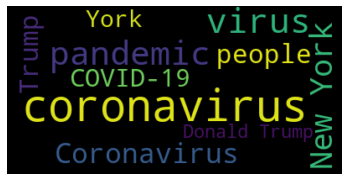

Topic: 1


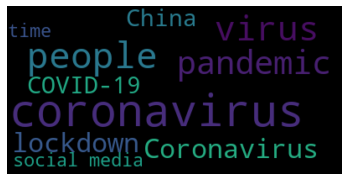

Topic: 2


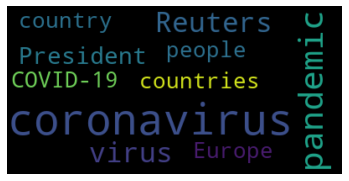

Topic: 3


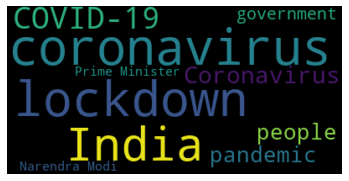

Topic: 4


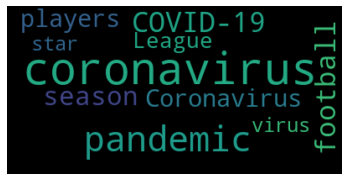

Topic: 5


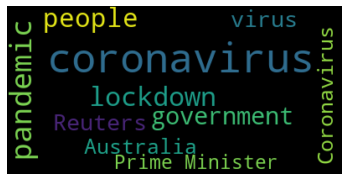

Topic: 6


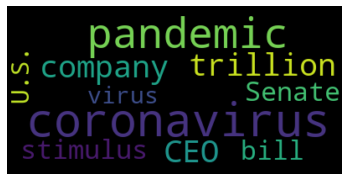

Topic: 7


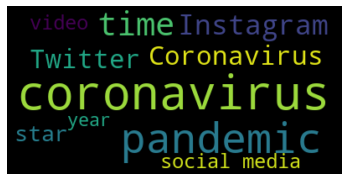

Topic: 8


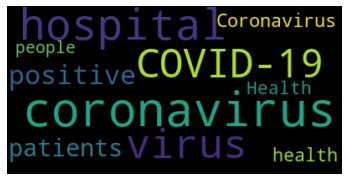

In [10]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {}'.format(idx))
    topic_list = topic.split('+')
    word_freq = {}
    for i,topic_tok in enumerate(topic_list):
        tok_list = topic_tok.strip().split('*')
        word_freq[tok_list[1][1:-1]] = float(tok_list[0])*1000
    wordcloud = WordCloud()
    wordcloud.generate_from_frequencies(frequencies=word_freq)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    file_name = 'covid-topic-{}.png'.format(idx)
    wordcloud.to_file(file_name)
    